# Chi-square test and Fisher's Exact Test

https://data-flair.training/blogs/chi-square-test-in-r/

http://mathworld.wolfram.com/FishersExactTest.html

### Import libraries

In [1]:
library(ggplot2)
library(plyr)
library(readxl)

In [2]:
bank_loan_data <- read_excel('datasets/Bank_Personal_Loan_Modelling.xlsx', 2L)

head(bank_loan_data, 5)

ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
dim(bank_loan_data)

[1] 5000   14

In [4]:
colnames(bank_loan_data)

[1] "ID"                "Age"               "Experience"       
 [4] "Income"            "ZIPCode"           "Family"           
 [7] "CCAvg"             "Education"         "Mortgage"         
[10] "PersonalLoan"      "SecuritiesAccount" "CDAccount"        
[13] "Online"            "CreditCard"

In [5]:
bank_loan_data <- bank_loan_data[ , c("Age", "Experience", "Income", "Family", 
                                      "Education", "PersonalLoan", "SecuritiesAccount", 
                                      "CDAccount", "Online", "CreditCard")]

head(bank_loan_data, 5)

Age,Experience,Income,Family,Education,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
25,1,49,4,1,0,1,0,0,0
45,19,34,3,1,0,1,0,0,0
39,15,11,1,1,0,0,0,0,0
35,9,100,1,2,0,0,0,0,0
35,8,45,4,2,0,0,0,0,1


In [6]:
dim(bank_loan_data)

[1] 5000   10

In [7]:
colSums(is.na(bank_loan_data))

Age        Experience            Income            Family 
                0                 0                 0                 0 
        Education      PersonalLoan SecuritiesAccount         CDAccount 
                0                 0                 0                 0 
           Online        CreditCard 
                0                 0

In [8]:
unique(bank_loan_data$PersonalLoan)

[1] 0 1

In [9]:
unique(bank_loan_data$Education)

[1] 1 2 3

In [10]:
unique(bank_loan_data$Family)

[1] 4 3 1 2

### Barplot 

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4)

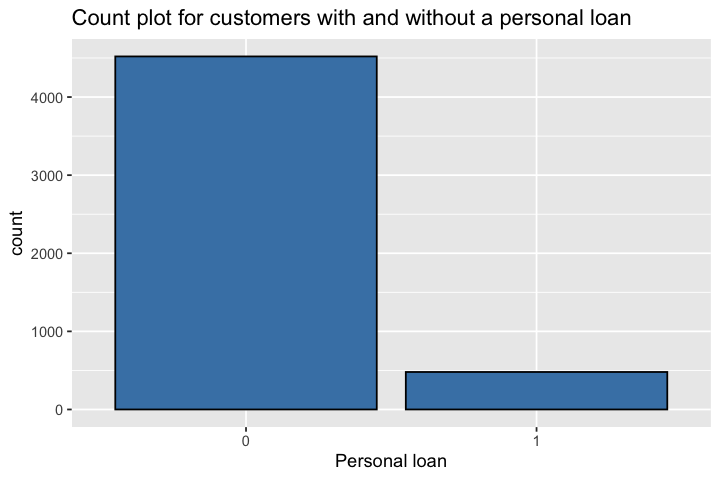

In [12]:
ggplot(data = bank_loan_data, 
       aes(factor(x = PersonalLoan))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Count plot for customers with and without a personal loan')+
       xlab('Personal loan') +
       ylab('count')

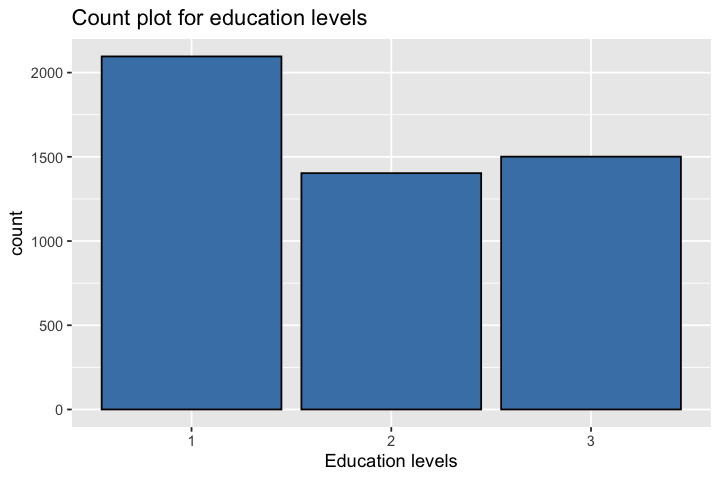

In [13]:
ggplot(data = bank_loan_data, 
       aes(factor(x = Education))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Count plot for education levels') +
       xlab('Education levels') +
       ylab('count')

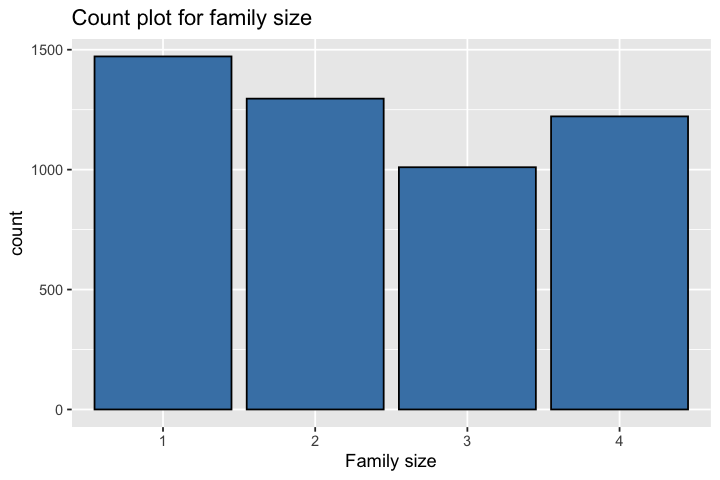

In [14]:
ggplot(data = bank_loan_data, 
       aes(factor(x = Family))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Count plot for family size') +
       xlab('Family size') +
       ylab('count')

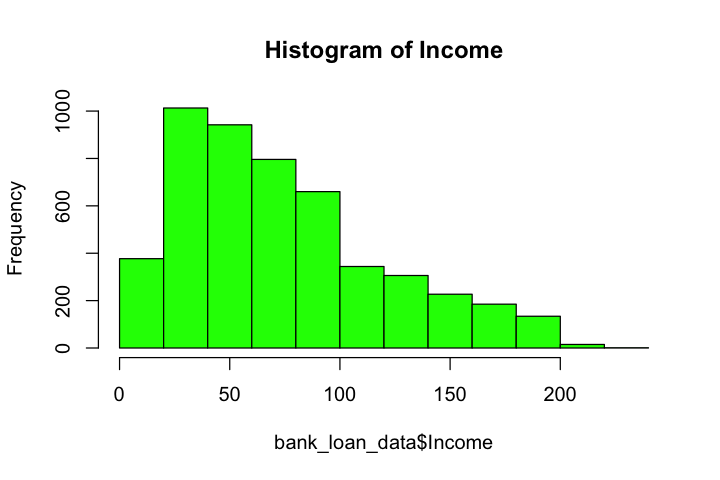

In [15]:
hist(bank_loan_data$Income, col = 'green', main = 'Histogram of Income')

### Boxplot by grouping by credit card 
https://nceas.github.io/oss-lessons/dataviz-and-interactive-tools/module-1-ggplot2.html

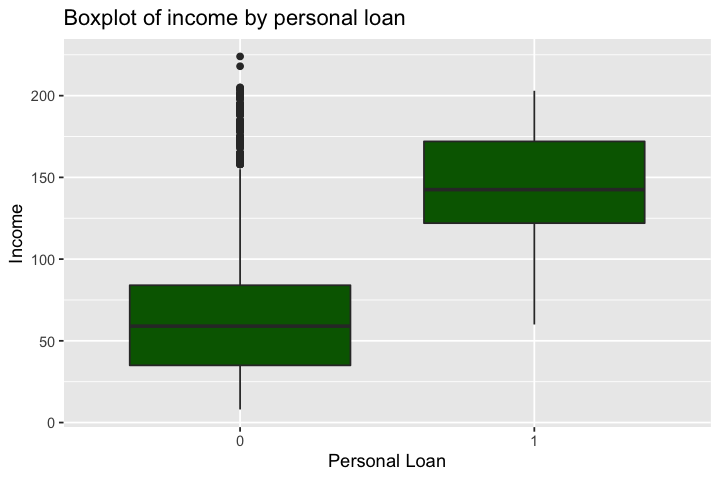

In [16]:
qplot(factor(x = PersonalLoan), y = Income,
      geom = 'boxplot', 
      data = bank_loan_data,
      xlab = 'Personal Loan',
      ylab = 'Income',
      fill = I('darkgreen'),
      main = 'Boxplot of income by personal loan')

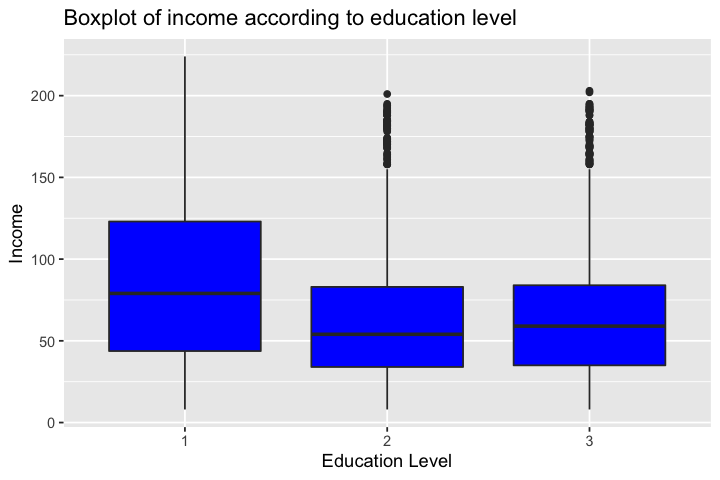

In [17]:
qplot(factor(x = Education), y = Income,
      geom = 'boxplot', 
      data = bank_loan_data,
      xlab = 'Education Level',
      ylab = 'Income',
      fill = I('blue'),
      main = 'Boxplot of income according to education level')

### Create contingency or 2X2 table

https://en.m.wikipedia.org/wiki/Contingency_table

http://vassarstats.net/tab2x2.html

https://www.andrew.cmu.edu/user/achoulde/94842/lectures/lecture07/lecture07-94842.html

In [23]:
contigency_table <- with(bank_loan_data, table(bank_loan_data$Education, 
                                               factor(bank_loan_data$PersonalLoan)))

head(contigency_table)

   
       0    1
  1 2003   93
  2 1221  182
  3 1296  205

In [25]:
contigency_table <- as.matrix(contigency_table)

contigency_table

   
       0    1
  1 2003   93
  2 1221  182
  3 1296  205

In [26]:
summary(contigency_table)

Number of cases in table: 5000 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 111.24, df = 2, p-value = 6.991e-25

### Chi-squared test
https://en.wikipedia.org/wiki/Chi-squared_test

In [27]:
chi2_test <- chisq.test(contigency_table, correct=FALSE)

chi2_test


	Pearson's Chi-squared test

data:  contigency_table
X-squared = 111.24, df = 2, p-value < 2.2e-16


##### We have a high chi-squared value and a p-value of less than 0.05 significance level. So we reject the null hypothesis and conclude that whether customers have personal loans is not independent of their educational levels

### `chi2_test` comes with a lots of information with `names` function as given below

In [28]:
names(chi2_test)

[1] "statistic" "parameter" "p.value"   "method"    "data.name" "observed" 
[7] "expected"  "residuals" "stdres"

### Expected values

In [157]:
expected_value <- as.matrix(chi2_test$expected)

expected_value

0,1
1894.784,201.216
1268.312,134.688
1356.904,144.096


In [158]:
colours <- c("orange", "blue", "green")

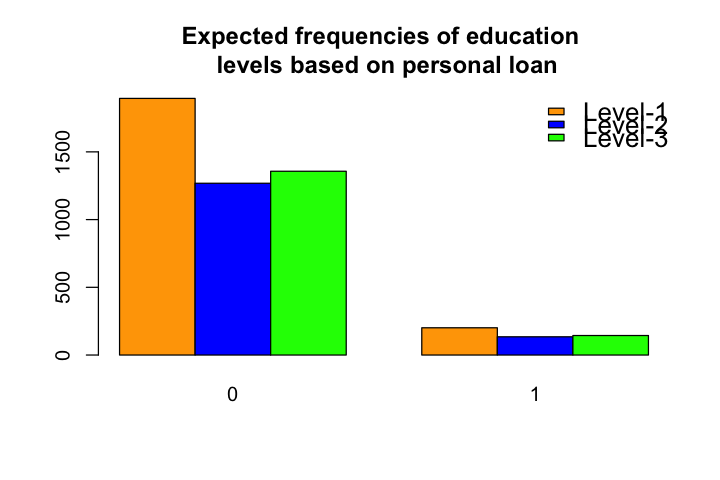

In [159]:
barplot(expected_value, beside = T, col = colours,
       main = 'Expected frequencies of education \n levels based on personal loan')

legend("topright", c("Level-1","Level-2", "Level-3"),
        cex = 1.3, bty = "n", fill = colours)

### Observed values

In [160]:
obs_value <- as.matrix(chi2_test$observed)

obs_value

   
       0    1
  1 2003   93
  2 1221  182
  3 1296  205

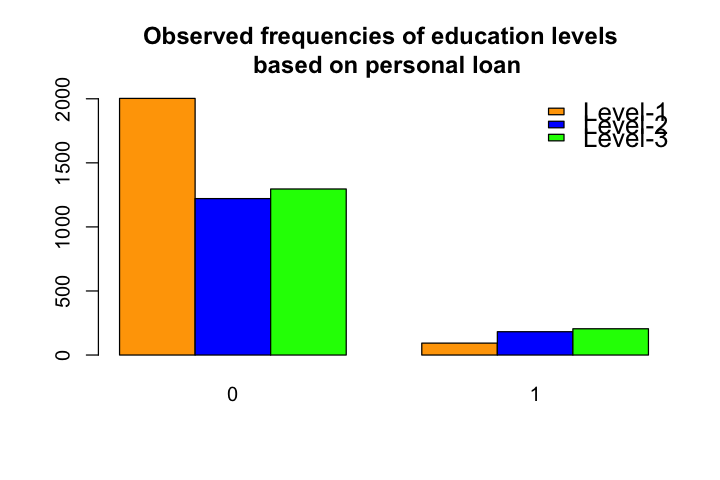

In [161]:
barplot(obs_value, beside = T, col = colours,
       main = 'Observed frequencies of education levels \n based on personal loan')

legend("topright", c("Level-1","Level-2", "Level-3"),
        cex = 1.3, bty = "n", fill = colours)

In [162]:
expected_value_npl = expected_value[, 1]

obs_value_npl = obs_value[, 1]

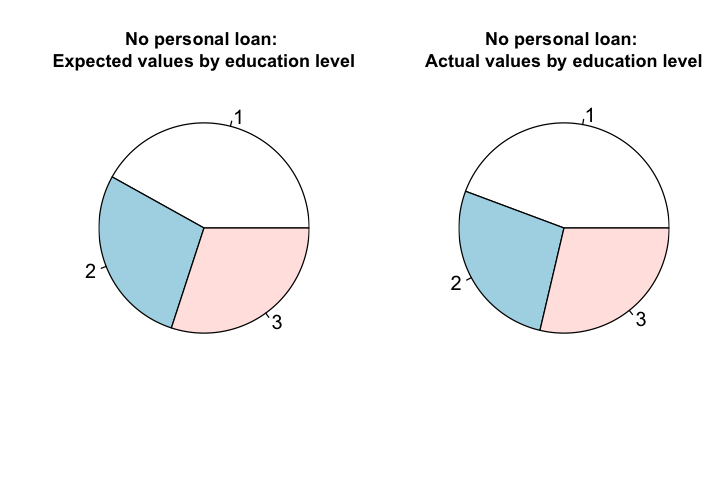

In [163]:
par(mfrow=c(1, 2), cex.main=0.9)

pie(expected_value_npl, main = "No personal loan: \nExpected values by education level", radius=2)
pie(obs_value_npl, main = "No personal loan: \nActual values by education level", radius=2)

In [164]:
expected_value_pl = expected_value[, 2]

obs_value_pl = obs_value[, 2]

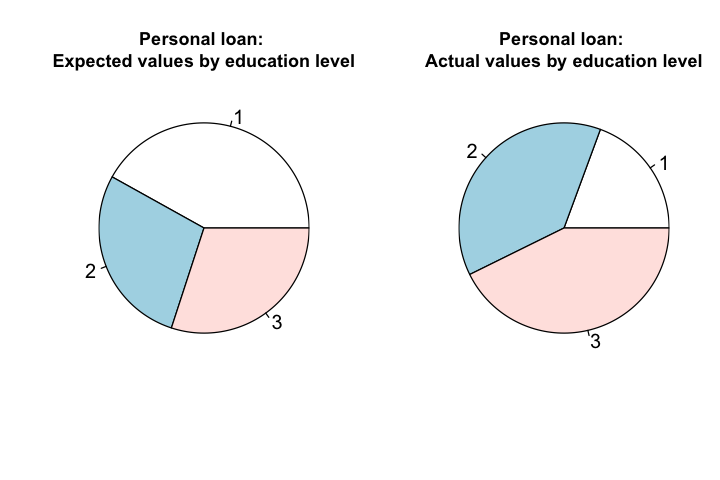

In [165]:
par(mfrow=c(1, 2), cex.main=0.9)

pie(expected_value_pl, main = "Personal loan: \nExpected values by education level", radius=2)
pie(obs_value_pl, main = "Personal loan: \nActual values by education level", radius=2)

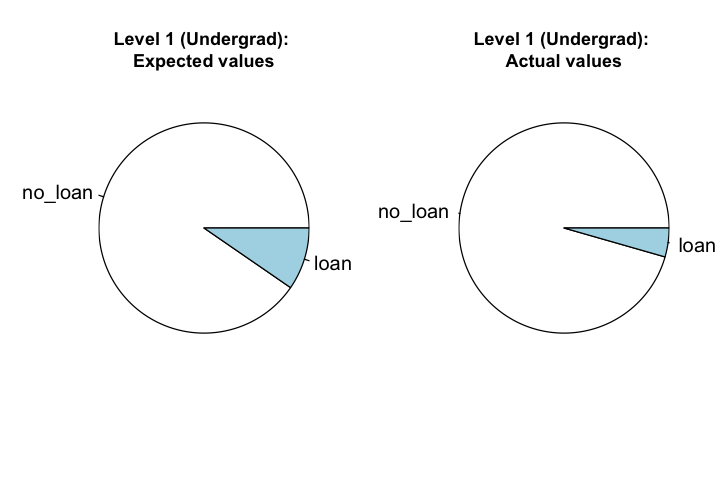

In [167]:
expected_education_level_1 = c(no_loan = expected_value[1, 1], loan = expected_value[1, 2])

obs_education_level_1 = c(no_loan = obs_value[1, 1], loan = obs_value[1, 2])

par(mfrow=c(1, 2), cex.main=0.9)

pie(expected_education_level_1, 
    main = "Level 1 (Undergrad): \nExpected values", radius=2)
pie(obs_education_level_1, 
    main = "Level 1 (Undergrad): \nActual values", radius=2)

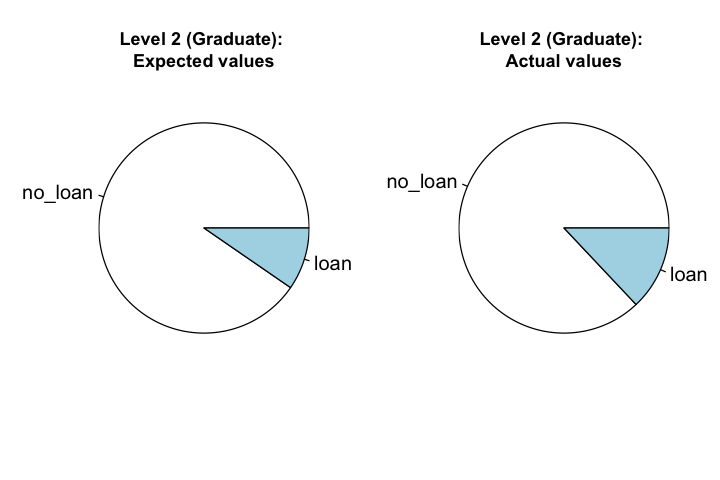

In [172]:
expected_education_level_2 = c(no_loan = expected_value[2, 1], loan = expected_value[2, 2])

obs_education_level_2 = c(no_loan = obs_value[2, 1], loan = obs_value[2, 2])

par(mfrow=c(1, 2), cex.main=0.9)

pie(expected_education_level_2, 
    main = "Level 2 (Graduate): \nExpected values", radius=2)
pie(obs_education_level_2, 
    main = "Level 2 (Graduate): \nActual values", radius=2)

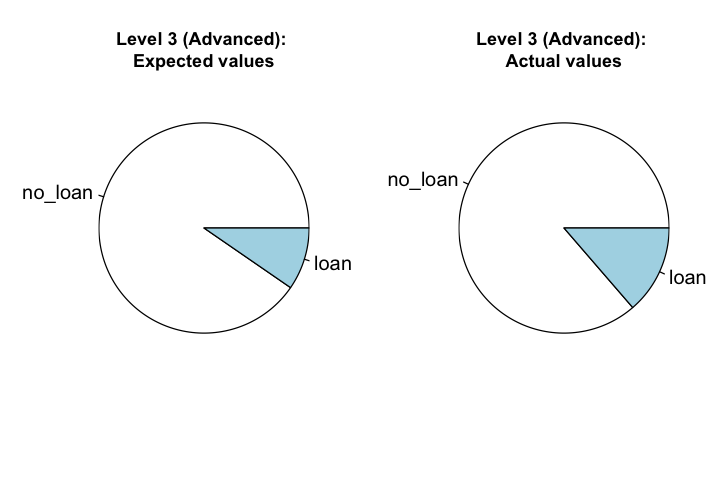

In [173]:
expected_education_level_3 = c(no_loan = expected_value[3, 1], loan = expected_value[3, 2])

obs_education_level_3 = c(no_loan = obs_value[3, 1], loan = obs_value[3, 2])

par(mfrow=c(1, 2), cex.main=0.9)

pie(expected_education_level_3, 
    main = "Level 3 (Advanced): \nExpected values", radius=2)
pie(obs_education_level_3, 
    main = "Level 3 (Advanced): \nActual values", radius=2)

### P-value

In [174]:
chi2_test$p.value

[1] 6.991474e-25

### statistic value or chi2_test value

In [175]:
chi2_test$statistic

X-squared 
 111.2399

### Fisher-test

Fisher's exact test is a statistical test used to determine if there are nonrandom associations between two categorical variables

http://mathworld.wolfram.com/FishersExactTest.html

In [176]:
fisher_test <- fisher.test(contigency_table, simulate.p.value = TRUE)

fisher_test


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  contigency_table
p-value = 0.0004998
alternative hypothesis: two.sided
